# **In this Notebook Exploratory Data analysis has been Performed on train.csv** 

In [8]:
#Importing basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Reading the train.csv file

In [9]:
train_df = pd.read_csv("train.csv")
train_df.head(10)

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
5,0025bde0c.jpg,3,8458 14 8707 35 8963 48 9219 71 9475 88 9731 8...
6,0025bde0c.jpg,4,315139 8 315395 15 315651 16 315906 17 316162 ...
7,002af848d.jpg,4,290800 6 291055 13 291311 15 291566 18 291822 ...
8,002fc4e19.jpg,1,146021 3 146275 10 146529 40 146783 46 147038 ...
9,002fc4e19.jpg,2,145658 7 145901 20 146144 33 146386 47 146629 ...


In [12]:
train_df.tail()

,ImageId,ClassId,EncodedPixels
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...
7094,ffffd67df.jpg,3,30931 43 31103 127 31275 211 31489 253 31745 2...


In [10]:
train_df.shape

(7095, 3)

Therefore there are 7095 rows and 3 Attributes in the given dataset

In [11]:
train_df.isnull().sum()

ImageId          0
ClassId          0
EncodedPixels    0
dtype: int64

Since there is no NULL/NAN/NA values in the given data set hence no data cleaning is required

In [13]:
train_df.describe()

,ClassId
count,7095.000000
mean,2.825229
std,0.789279
min,1.000000
25%,3.000000
50%,3.000000
75%,3.000000
max,4.000000


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ImageId        7095 non-null   object
 1   ClassId        7095 non-null   int64 
 2   EncodedPixels  7095 non-null   object
dtypes: int64(1), object(2)
memory usage: 166.4+ KB


So, we can conclude that ImageId and EncodedPixel are of string/object type whereas ClassId is of integer type

**Let's analyse number of labels for each defect type**

In [15]:
defect1 = train_df[train_df['ClassId']==1].EncodedPixels.count()
defect2 = train_df[train_df['ClassId']==2].EncodedPixels.count()
defect3 = train_df[train_df['ClassId']==3].EncodedPixels.count()
defect4 = train_df[train_df['ClassId']==4].EncodedPixels.count()

print('There are {} defect1 images'.format(defect1))
print('There are {} defect2 images'.format(defect2))
print('There are {} defect3 images'.format(defect3))
print('There are {} defect4 images'.format(defect4))

There are 897 defect1 images
There are 247 defect2 images
There are 5150 defect3 images
There are 801 defect4 images


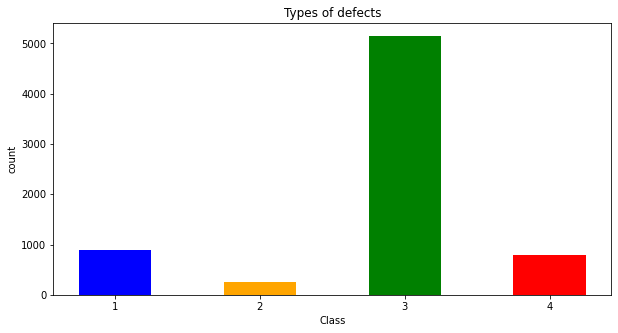

In [16]:
#Plotting bar graph based on the count of each labels
labels = '1','2','3','4'
sizes = [defect1,defect2,defect3,defect4]

fig = plt.figure(figsize=(10,5))

#creating the bar plot
plt.bar(labels,sizes,color=['blue','orange','green','red'],width = 0.5)
plt.xlabel('Class')
plt.ylabel('count')
plt.title('Types of defects')
plt.show()

Here we can observe that defect type 3 is more dominant compared to any other defects and defect type 2 is least occuring defects. Hence there is a class imbalance. 

**Now let us check whether the single image has more than one defect simultaneously**

Text(0.5, 1.0, 'Number of Labels per Image')

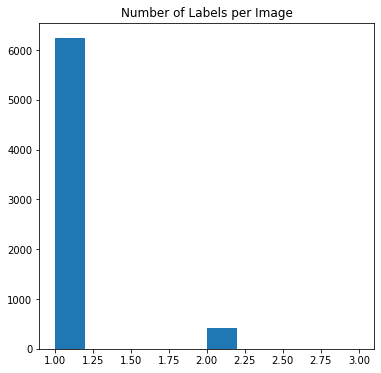

In [17]:
labels_per_image = train_df.groupby('ImageId')['EncodedPixels'].count()
fig,ax = plt.subplots(figsize=(6,6))
ax.hist(labels_per_image)
ax.set_title('Number of Labels per Image')

In [18]:
print('There are {} images with 1 label'.format(labels_per_image[labels_per_image==1].count()))
print('There are {} images with 2 label'.format(labels_per_image[labels_per_image==2].count()))
print('There are {} images with 3 label'.format(labels_per_image[labels_per_image==3].count()))
print('There are {} images with 4 label'.format(labels_per_image[labels_per_image==3].count()))

There are 6239 images with 1 label
There are 425 images with 2 label
There are 2 images with 3 label
There are 2 images with 4 label


**Conclusion:**



1.   Most of images with defects contain the defects of only one type
2.   In rare cases an image contains the defects of two different types simulataneously.



**And all the images is of size 256X1600**